# Flipkart best Laptops

### Importing important libraries

In [1]:
from bs4 import BeautifulSoup as Soup
import requests
import re
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
# Use the requests library to download web pages
url = "https://www.flipkart.com/search?q=laptops&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off"
result = requests.get(url)
print(url)
print(result)

https://www.flipkart.com/search?q=laptops&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off
<Response [200]>


In [3]:
# Use Beautiful Soup to parse and extract information
content = result.text
soup1 = Soup(content, 'html.parser')

In [4]:
# Adding All pages content

pages_link = soup1.find_all('a',class_='ge-49M')
domain = "https://www.flipkart.com/search?q=laptops&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page="

for i in range(2,41):
    link = domain+str(i)
    page_data = requests.get(link)
    content1 = page_data.text
    content += content1
    

In [5]:
# Use Beautiful Soup to parse and extract information
soupdata = Soup(content, 'html.parser')
type(soupdata)

bs4.BeautifulSoup

In [6]:
# Getting all laptops details and storing it in containers
containers = soupdata.find_all('div', class_='_2kHMtA')
print(type(containers), len(containers))

<class 'bs4.element.ResultSet'> 936


In [8]:
# Create CSV file(s) with the extracted information

f = open('laptops_info.csv','wb')
f.write('ProductName,Stars,Ratings,Reviews,CurrentPrice,MRP,Processor,Ram,Storage\n'.encode())


for container in containers:
    #Finding Product Name
    product = container.find('div', class_='_4rR01T')
    ProductName= product.text.split('-')[0].strip()
    
    # Finding Stars
    star = container.find('div', class_='_3LWZlK')
    try:
        Stars = star.text
    except:
        Stars = 0
    
    # Finding Ratings & Reviews
    Rating = container.find('span', class_='_2_R_DZ')
    try:
        ratRev = re.findall('\d+,?\d*', Rating.text)
        Ratings = ratRev[0].replace(',','')
        Reviews = ratRev[1].replace(',','')
    except:
        Ratings = 0
        Reviews = 0
    
    #Finding Current Price
    CurrentPrice = container.find('div', class_='_30jeq3 _1_WHN1').text.replace(',','').replace('₹','')
    
    #Find MRP
    mrp = container.find('div',class_='_3I9_wc _27UcVY')
    try:
        MRP = mrp.text.replace(',','').replace('₹','')
    except:
        MRP = 0
        
    #Finding Information about the product
    info = container.findAll('li',class_='rgWa7D')
    Processor = info[0].text
    Ram = info[1].text
    Storage = info[3].text

    #print(ProductName, Stars, Ratings, Reviews, CurrentPrice, MRP, Processor, Ram, Storage)
    f.write(f"{ProductName},{Stars},{Ratings},{Reviews},{CurrentPrice},{MRP},{Processor},{Ram},{Storage}\n".encode())
    #print('\n')

f.close()


In [9]:
# Verify the information in the CSV files by reading them back using Pandas.
data = pd.read_csv("laptops_info.csv",on_bad_lines='skip')
data

,ProductName,Stars,Ratings,Reviews,CurrentPrice,MRP,Processor,Ram,Storage
0,Lenovo Ryzen 5 Hexa Core 5600H,0.0,0,0,54490,89490,AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,256 GB SSD
1,ASUS VivoBook 15 (2022) Core i3 10th Gen,4.3,9345,937,33990,45990,Intel Core i3 Processor (10th Gen),8 GB DDR4 RAM,512 GB SSD
2,HP Celeron Dual Core,0.0,0,0,25990,36965,Intel Celeron Dual Core Processor,8 GB DDR4 RAM,256 GB SSD
3,Lenovo IdeaPad 5 Core i5 12th Gen,0.0,0,0,65300,97890,Intel Core i5 Processor (12th Gen),16 GB DDR4 RAM,512 GB SSD
4,ASUS TUF Gaming A17 with 90Whr Battery Ryzen 5...,4.4,1139,146,52990,71990,AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,512 GB SSD
...,...,...,...,...,...,...,...,...,...
901,Lenovo ThinkPad Core i5 10th Gen,0.0,0,0,146680,0,Intel Core i5 Processor (10th Gen),8 GB DDR4 RAM,512 GB HDD|512 GB SSD
902,ASUS ExpertBook B9 Core i7 10th Gen,0.0,0,0,169490,202990,Intel Core i7 Processor (10th Gen),16 GB LPDDR3 RAM,1 TB SSD
903,Nokia PureBook S14 Core i5 11th Gen,4.1,93,19,47990,82990,Intel Core i5 Processor (11th Gen),8 GB DDR4 RAM,512 GB SSD
904,HP Victus Core i5 11th Gen,4.3,348,52,81900,88900,Intel Core i5 Processor (11th Gen),8 GB DDR4 RAM,512 GB SSD


In [10]:
# Shape of data
data.shape

(906, 9)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 906 entries, 0 to 905
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ProductName   906 non-null    object 
 1   Stars         906 non-null    float64
 2   Ratings       906 non-null    int64  
 3   Reviews       906 non-null    int64  
 4   CurrentPrice  906 non-null    int64  
 5   MRP           906 non-null    int64  
 6   Processor     906 non-null    object 
 7   Ram           906 non-null    object 
 8   Storage       906 non-null    object 
dtypes: float64(1), int64(4), object(4)
memory usage: 63.8+ KB


In [13]:
# Removing Duplicate data
df = data.drop_duplicates(['Stars','Ratings','Reviews','CurrentPrice','MRP'])
df.shape

(769, 9)

### Find the Product having highest Reviews

In [14]:
df[df['Reviews']==max(df['Reviews'])]

,ProductName,Stars,Ratings,Reviews,CurrentPrice,MRP,Processor,Ram,Storage
573,realme Book (Slim) Core i3 11th Gen,4.4,12115,1821,46990,54999,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,256 GB SSD


In [15]:
top_5 = data.sort_values(by='Reviews', ascending = False).head()

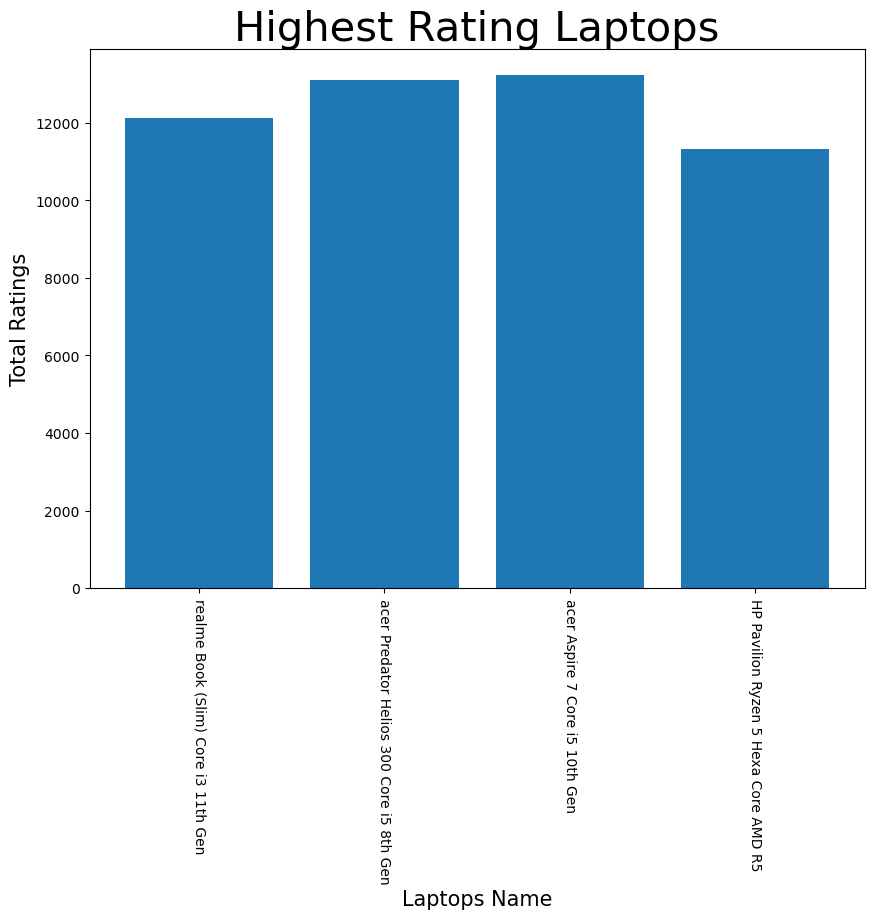

In [16]:
plt.figure(figsize=(10,7))
plt.bar(x=top_5['ProductName'], height = top_5['Ratings'])
plt.title('Highest Rating Laptops', fontsize=30)
plt.xlabel('Laptops Name', fontsize=15)
plt.ylabel('Total Ratings', fontsize=15)
plt.xticks(rotation = 270)

plt.show()

### Find the Product Having highest Stars

In [17]:
df.sort_values(by='Stars', ascending = False).head(5)

,ProductName,Stars,Ratings,Reviews,CurrentPrice,MRP,Processor,Ram,Storage
310,ASUS ROG Zephyrus M16 (2022) with 90Whr Batter...,5.0,3,0,178021,227990,Intel Core i7 Processor (12th Gen),16 GB DDR5 RAM,1 TB SSD
227,ASUS ZenBook Duo 14 (2021) Touch Panel Core i5...,5.0,3,0,79990,140990,Intel Core i5 Processor (11th Gen),16 GB LPDDR4X RAM,512 GB SSD
480,Lenovo Core i3 10th Gen,5.0,1,1,37890,48900,Intel Core i3 Processor (10th Gen),4 GB DDR4 RAM,256 GB SSD
456,Lenovo Yoga 6 Ryzen 5 Hexa Core 5500U,5.0,8,1,74990,104890,AMD Ryzen 5 Hexa Core Processor,16 GB DDR4 RAM,512 GB SSD
452,acer Aspire 5 Ryzen 7 Octa Core 5700U,5.0,3,0,59990,79999,AMD Ryzen 7 Octa Core Processor,8 GB DDR4 RAM,512 GB SSD


### Most Affordable Laptops

In [18]:
Lowest_price = df.sort_values(by='CurrentPrice', ascending = True).head(10)
Lowest_price

,ProductName,Stars,Ratings,Reviews,CurrentPrice,MRP,Processor,Ram,Storage
303,ASUS Chromebook Flip Touch Celeron Dual Core,4.0,1639,258,15990,31990,Intel Celeron Dual Core Processor,4 GB LPDDR4 RAM,29.46 cm (11.6 inch) Touchscreen Display
355,ASUS Chromebook Celeron Dual Core,3.7,1455,197,17990,25990,Intel Celeron Dual Core Processor,4 GB LPDDR4 RAM,39.62 cm (15.6 inch) Display
140,Lenovo Celeron Dual Core,3.9,105,7,19490,36000,Intel Celeron Dual Core Processor,4 GB LPDDR4 RAM,256 GB HDD|256 GB SSD
150,Lenovo IdeaPad 3 CB Celeron Dual Core,0.0,0,0,19800,34890,Intel Celeron Dual Core Processor,4 GB DDR4 RAM,35.56 cm (14 Inch) Display
674,ASUS EeeBook 12 Celeron Dual Core,4.0,14,0,19990,27990,Intel Celeron Dual Core Processor,4 GB DDR4 RAM,29.46 cm (11.6 Inch) Display
716,Avita SATUS ULTIMUS Celeron Dual Core,3.8,590,84,19990,29990,Intel Celeron Dual Core Processor,4 GB LPDDR4 RAM,128 GB SSD
761,ASUS Chromebook Celeron Dual Core,3.6,378,50,19990,22990,Intel Celeron Dual Core Processor,4 GB LPDDR4 RAM,29.46 cm (11.6 Inch) Display
41,Lenovo Athlon Dual Core 3050U,5.0,3,0,20990,35000,AMD Athlon Dual Core Processor,4 GB DDR4 RAM,256 GB SSD
592,Infinix INBook X1 Neo Series Celeron Quad Core,4.2,630,107,20990,29990,Intel Celeron Quad Core Processor,4 GB LPDDR4X RAM,128 GB SSD
757,ASUS Chromebook Flip Touch Celeron Dual Core,4.0,1639,258,22990,29990,Intel Celeron Dual Core Processor,4 GB LPDDR4 RAM,29.46 cm (11.6 inch) Touchscreen Display


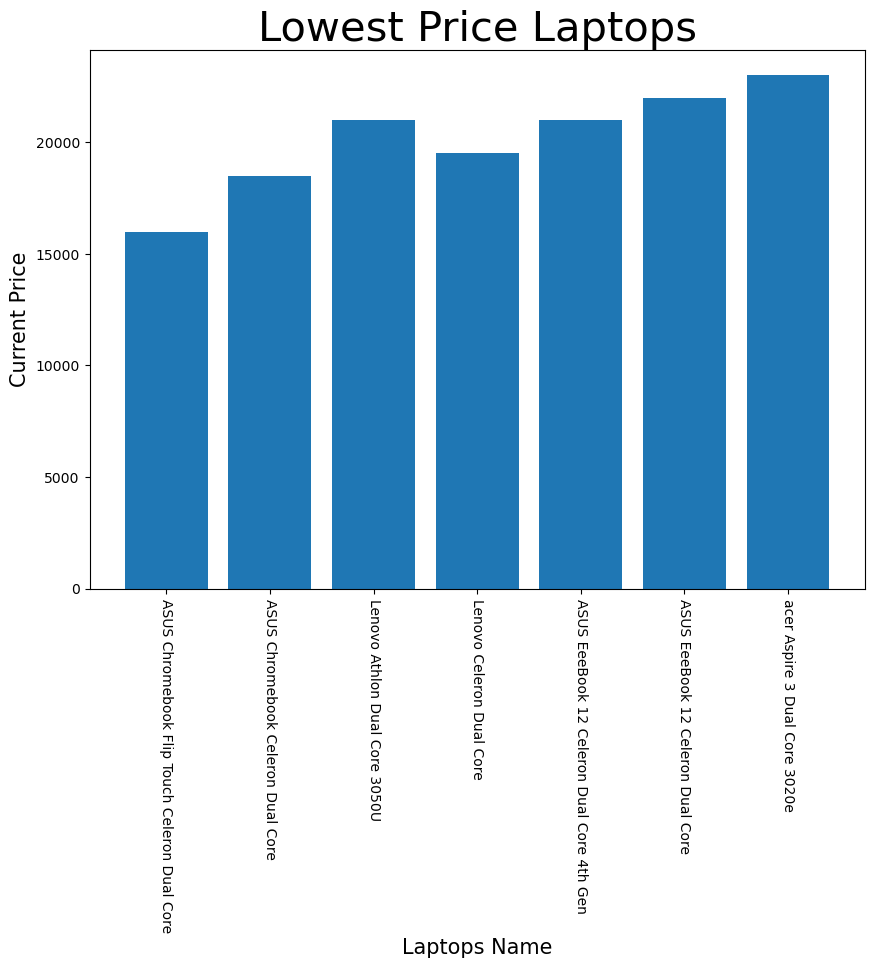

In [41]:
plt.figure(figsize=(10,7))
plt.bar(x=Lowest_price['ProductName'], height = Lowest_price['CurrentPrice'])
plt.title('Lowest Price Laptops', fontsize=30)
plt.xlabel('Laptops Name', fontsize=15)
plt.ylabel('Current Price', fontsize=15)
plt.xticks(rotation = 270)

plt.show()